In [307]:
import pandas as pd
import numpy as np
import datetime
# from pandas_datareader import date, wb
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [308]:
df = pd.read_csv('/Users/liuxuan/Desktop/未命名檔案夾 3/Xuan Liu Career/Data/DS Collection 资料/Conversion Rate/conversion_data.csv')
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [309]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


Age = 123 or 11 so weired!!! -- Remove the users

In [310]:
df.sort_values('age', ascending = False) 
df = df[df['age']<=79]

## Visualization

### 1. Group by Variables

For simplification of coding work, just automate functions firstly.

In [311]:
def df_group(data, group):
    df_by_group = data.groupby(group)['converted'].mean()
    df_by_group = df_by_group.reset_index()
    return df_by_group

In [312]:
def plot_group(df_by_group, group):
    fig, ax = plt.subplots(figsize=(8,6))
    sns.barplot(x = group,y = 'converted', data = df_by_group, ax = ax)
    plt.suptitle("Mean of Conversions by" + ' ' + str(group))
    plt.ylabel("Conversion")
    plt.xlabel(str(group))
    plt.show()

##### Group by Country

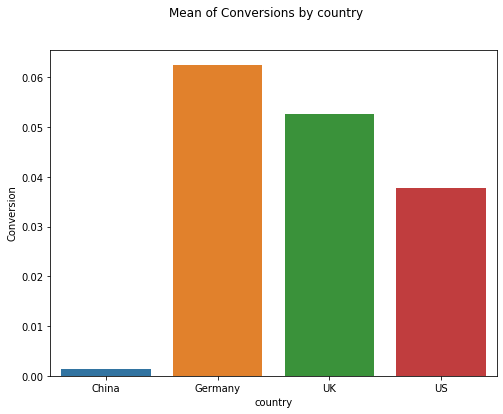

In [313]:
df_country = df_group(df, group = 'country')
plot_group(df_country, group = 'country')

Conversions in __China__ performs much lower than in other countries.

##### Group by Total Pages Visited

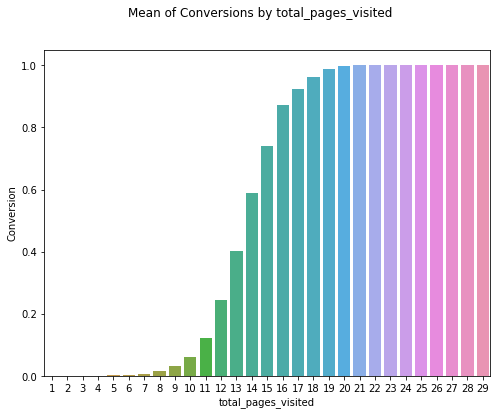

In [314]:
df_page = df_group(df, group = 'total_pages_visited')
plot_group(df_page, group = 'total_pages_visited')

##### Group by Age

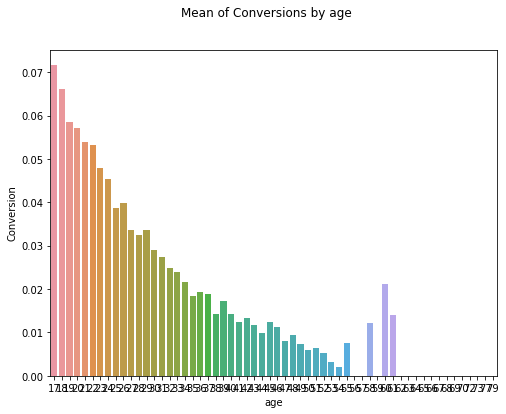

In [315]:
df_age = df_group(df, group = 'age')
plot_group(df_age, group = 'age')

##### Group by Source

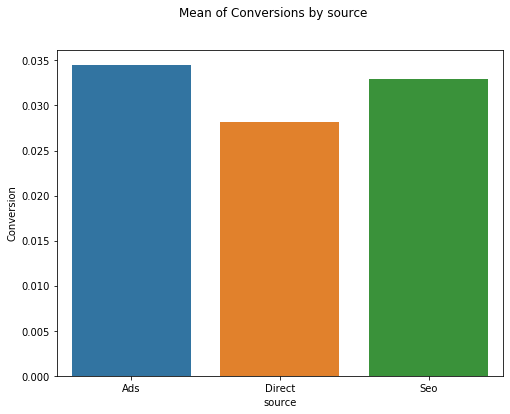

In [316]:
df_source = df_group(df, group = 'source')
plot_group(df_source, group = 'source')

##### Group by New User

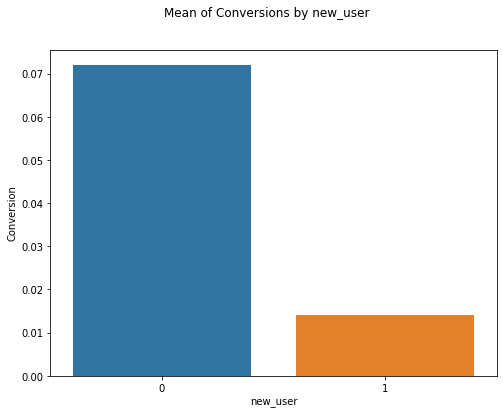

In [317]:
df_new_user = df_group(df, group = 'new_user')
plot_group(df_new_user, group = 'new_user')

##### By Country and then by User or Source

In [318]:
def country_by_group(data, group):    
    df_country_group = data.groupby(['country', group])['converted'].mean()
    df_country_group = df_country_group.reset_index()
    sns.barplot(x = 'country', y = 'converted', data = df_country_group, hue = group)
    plt.show()

##### Group by Country, then by New User

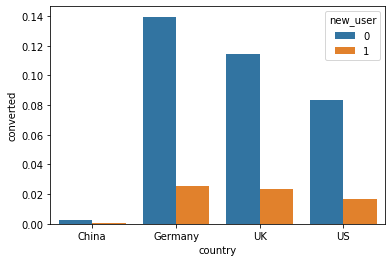

In [21]:
country_by_group(df, group = 'new_user')

##### Group by Country, then by Source

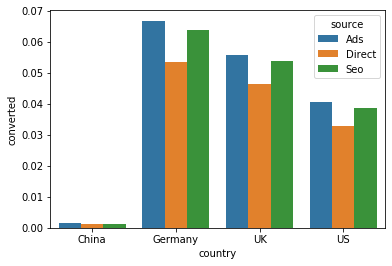

In [22]:
country_by_group(df, group = 'source')

### 2. Group by Pages

In [27]:
df_pages = df.groupby('total_pages_visited')['converted'].mean()
df_pages = df_pages.reset_index()

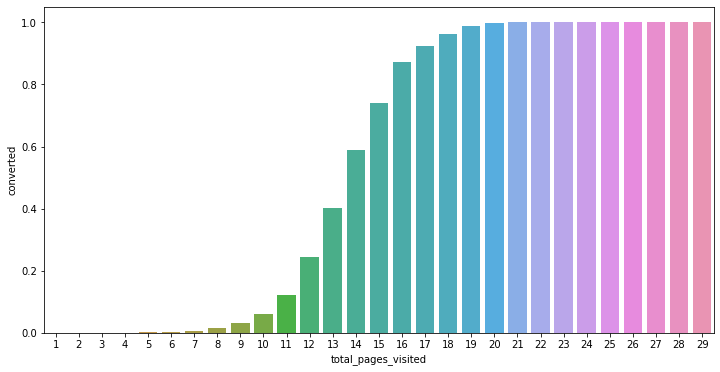

In [28]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x = "total_pages_visited", y = "converted", data=df_pages)
plt.show()

## Machine Learning Prediction
### Random Forest

Predict conversion rate.

In [29]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In this part:

- split:0.66 train vs. test;
- 1) RF: # 100 trees; 
   2) variable importance;
- 1) RF rebuild without 'Total pages: # 100 trees; 
   2) variable importance;


In [86]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder

##### Preparation

In [31]:
#df_RF = pd.get_dummies(df, columns = ['country','source'], drop_first = True)

In [219]:
df_RF = df
le = LabelEncoder()
le.fit(df['country'])
df_RF['country'] = le.transform(df['country'])

le.fit(df['source'])
df_RF['source'] = le.transform(df['source'])

In [95]:
# check missing values
df_RF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316198 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   country              316198 non-null  int64
 1   age                  316198 non-null  int64
 2   new_user             316198 non-null  int64
 3   source               316198 non-null  int64
 4   total_pages_visited  316198 non-null  int64
 5   converted            316198 non-null  int64
dtypes: int64(6)
memory usage: 16.9 MB


##### Split dataset into training & test

In [97]:
y = df_RF['converted']
X = df_RF[['age', 'new_user', 'total_pages_visited', 'country', 'source']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.34)

##### Create a Gaussian Classifier

In [98]:
clf = RandomForestClassifier(n_estimators=100, max_depth = 3)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [99]:
# Predict
predictions = clf.predict(X_test)

In [100]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
classification_report(y_test, predictions) 

'              precision    recall  f1-score   support\n\n           0       0.99      1.00      0.99    104061\n           1       0.89      0.62      0.73      3447\n\n    accuracy                           0.99    107508\n   macro avg       0.94      0.81      0.86    107508\nweighted avg       0.98      0.99      0.98    107508\n'

In [101]:
confusion_matrix(y_test, predictions)

array([[103791,    270],
       [  1314,   2133]])

In [103]:
print('Accuracy: {}%'.format(int(metrics.accuracy_score(y_test, predictions)*100)))

Accuracy: 98%


-- Looks perfect for the prediction model!

##### Identifying Important Variables

In [104]:
# variable importance
feature_imp = pd.Series(clf.feature_importances_, index = X.columns).sort_values(ascending = False)

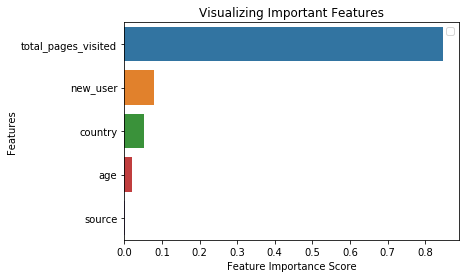

In [105]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

__Total pages visited__ is the most important one, by far. Unfortunately, it is probably the least “actionable”. People visit many pages cause they already want to buy. Also, in order to buy you have to click on multiple pages.

Let’s rebuild the RF without that variable. Since classes are heavily unbalanced and we don’t have that very powerful variable anymore, let’s change the weight a bit, just to make sure we will get something classified as 1.

In [231]:
X1 = X.drop(['total_pages_visited'], axis=1)
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = 0.34)
clf1 = RandomForestClassifier(n_estimators = 100, max_depth = 3)
clf1.fit(X1_train, y_train)
predictions1 = clf1.predict(X1_test)

In [232]:
# confusion matrix
metrics.confusion_matrix(y_test, predictions1)

array([[104018,      0],
       [  3490,      0]])

In [233]:
# Accuracy
print("Accuracy: {}%".format(int(metrics.accuracy_score(y_test, predictions1)*100)))

Accuracy: 96%


-- Decreased.

Then we check about importance of features as well.

In [237]:
# variable importance
feature_imp1 = pd.Series(clf1.feature_importances_, index = X1.columns).sort_values(ascending = False)
feature_imp1

new_user    0.406967
country     0.324325
age         0.262861
source      0.005847
dtype: float64

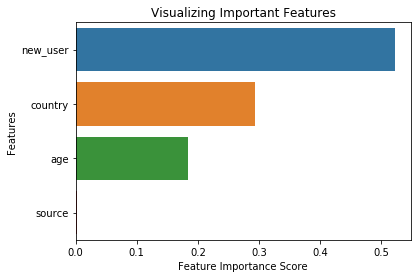

In [236]:
sns.barplot(x = feature_imp1, y = feature_imp1.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

We might have a quick check about partial dependence for 'new_user','age','country', 'source'. So, I am carry GBR regression in the following.

In [234]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
clf2 = GradientBoostingRegressor(n_estimators = 100, max_depth = 3)
clf2.fit(X1_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Text(0.5, 0.98, 'Partial Dependence of Conversion Value, with Gradient Boosting')

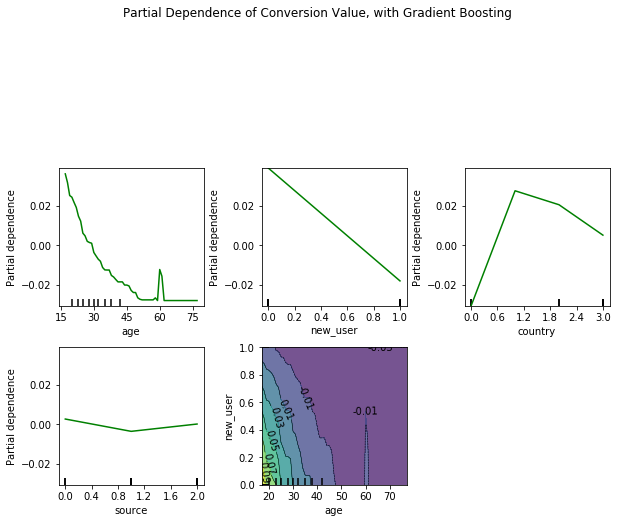

In [239]:
plot_partial_dependence(clf2, X=X1_train, features = [0, 1, 2, 3, (0,1)], feature_names = X1_train.columns, figsize=(9,8), n_jobs=2)
fig = plt.gcf()
fig.suptitle('Partial Dependence of Conversion Value, with Gradient Boosting')
#fig.subplots_adjust(wspace=0.4, hspace=0.3)


- new_user: current user(new_user = 0) convert much higher than new user (new_user = 1);
- age: it is more popular for users of age <45;
- country: worst for users in China(0) and best for Germany(1) and similar for those in UK and US;
- source: irrelavant;


In [202]:
X1_train

,age,new_user,country,source
161187,36,1,2,2
50454,36,1,3,2
42878,24,1,3,1
276156,32,1,3,0
216252,40,1,2,2
...,...,...,...,...
133477,30,1,2,1
94883,39,0,2,2
188587,27,0,3,2
267454,29,0,3,1


In [344]:
fig = plt.figure()

feature = [0]
pdp, axes = partial_dependence(clf2, feature,X1_train, grid_resolution=20)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                       cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle('Partial Dependence of Conversion on age & new_user, with Gradient Boosting')
plt.subplots_adjust(top=0.9)

plt.show()

AssertionError: 

<Figure size 432x288 with 0 Axes>

In [336]:
X1_train[feature]

,age,new_user
14350,30,1
81169,18,1
193385,26,1
140756,22,1
179789,22,1
...,...,...
68383,38,1
290862,42,0
66704,32,1
298714,22,1


### Decision Tree

Now, I am building a decision tree to check the 2 or 3 most important segments.

In [261]:
from sklearn import tree

In [262]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,2,25,1,0,1,0
1,3,23,1,2,5,0
2,3,28,1,2,4,0
3,0,39,1,2,5,0
4,3,30,1,2,6,0


In [302]:
X2 = df.drop(['converted', 'total_pages_visited'], axis = 1)
y2 = df[['converted']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.34)

In [303]:
dt = tree.DecisionTreeClassifier(max_depth = 3)
dt.fit(X2_train, y2_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [304]:
prediction = dt.predict(X2_test)
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy: {} %".format(int(100*accuracy_score(y2_test, prediction))))

Accuracy: 96 %


In [305]:
pd.DataFrame(confusion_matrix(y_test, prediction),columns = ['Predicted Not Survival', 'Predicted Survival'], index = ['True Not Survival', 'True Survival'])

,Predicted Not Survival,Predicted Survival
True Not Survival,104018,0
True Survival,3490,0


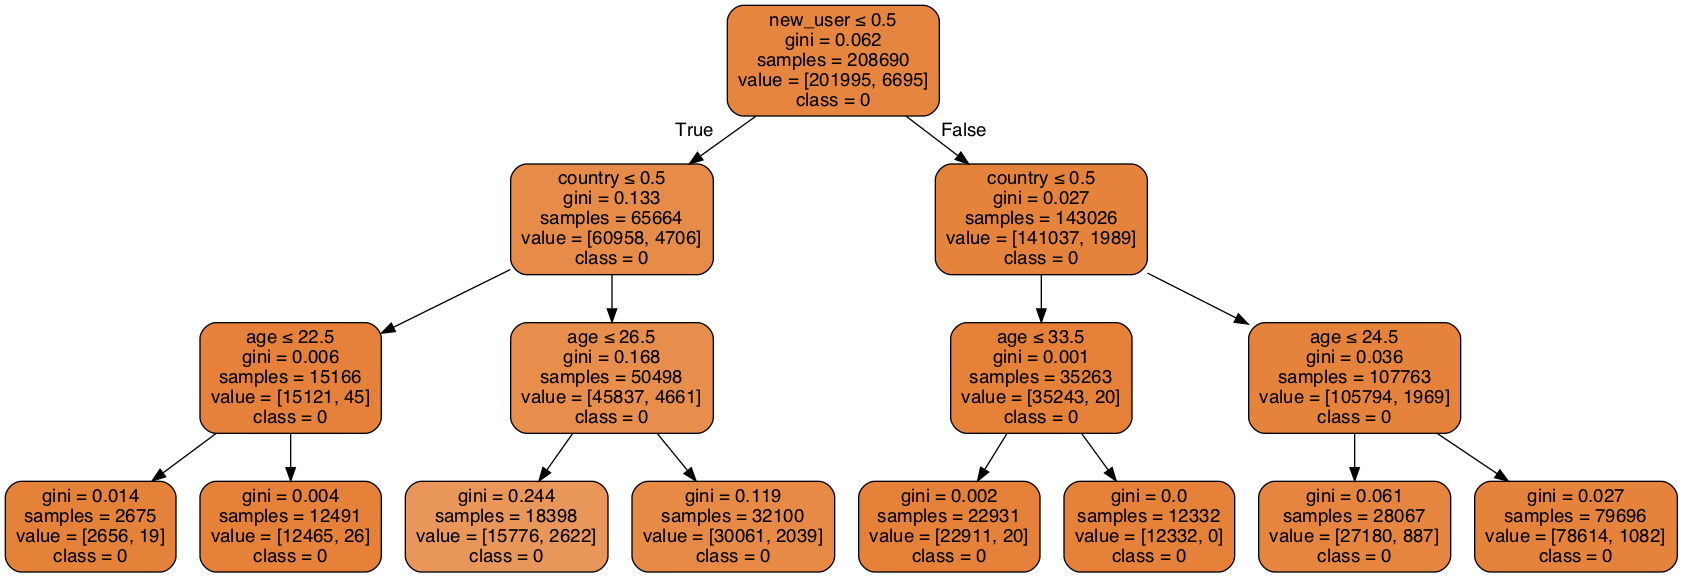

In [306]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X2.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [297]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive

In [298]:
# class labels
labels = X2.columns
def plot_tree(crit, split, depth, min_split, min_leaf):
    estimator = tree.DecisionTreeClassifier(random_state = 0 
          , criterion = crit
          , splitter = split
          , max_depth = depth
          , min_samples_split=min_split
          , min_samples_leaf=min_leaf)
    estimator.fit(X2, y2)
    
    graph = Source(tree.export_graphviz(estimator
          , out_file=None
          , feature_names=labels
          , class_names=['0', '1', '2']
          , filled = True))
    display(SVG(graph.pipe(format='svg')))
    
    return estimator

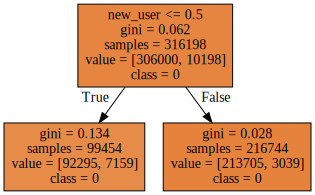

In [299]:
inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4]
   , min_split=(0.1,1)
   , min_leaf=(0.1,0.5))
display(inter)

In [300]:
list(X_train.columns.values)

['age', 'new_user', 'total_pages_visited', 'country', 'source']

### Conclusion

The site is more popular for young users with age of [20, 35]. It might bring great improvement if we suggest marketing to target to this group with market channel and Ads.

Also, we should go through to figure out why the elder users convert less and less. The conversion drops with age greater than 30.

The conversion performs very well in Germany but the initial visitors come to the site is much less than in the UK with larger population. There might be great potential in Germany.

Comparaed to Germany market, the conversion in China is very poor(Huge opportunity!) so that we might consider to develop product roadmap about translation, local culture, payment platform, etc. 

The conversion of current users is much higher, which make sense. So, we could focus more to maintain the current users and increase their active use.

